In [3]:
import cv2 as cv
import numpy as np

In [1]:
from Datasets import Datasets

ac_dataset = Datasets.datasets()["AcMüDüHo"]
train = ac_dataset[0].images

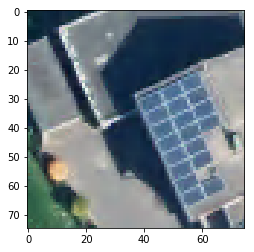

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train[1][:,:,::-1])

In [43]:
orig = train[1]
orig = (orig * 255).astype(np.uint8)

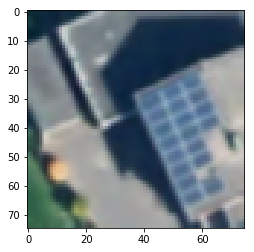

In [117]:
blur = cv.GaussianBlur(orig,(3,3),0)
plt.imshow(blur[:,:,::-1])

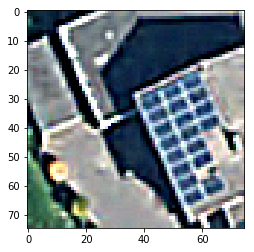

In [118]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv.filter2D(blur, -1, kernel)
plt.imshow(sharpened[:,:,::-1])

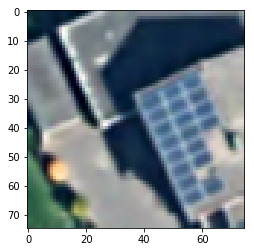

In [146]:
blur2 = cv.GaussianBlur(blur, (0, 0), 3);
sharpened2 = cv.addWeighted(blur, 1.5, blur2, -0.5, 0);
plt.imshow(sharpened2[:,:,::-1])


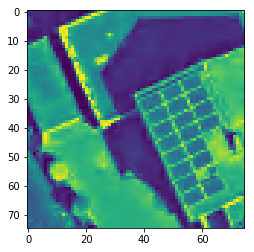

In [120]:
gray = cv.cvtColor(sharpened2, cv.COLOR_BGR2GRAY)

plt.imshow(gray)

In [95]:
75*75, int(0.7 * gray.shape[0] * gray.shape[1]), gray.size

(5625, 3937, 5625)

In [156]:
def detect_msers(image):
    mser_image = (image * 255).astype(np.uint8)
    #blur
    mser_blur = cv.GaussianBlur(mser_image,(3,3),0)
    #sharpen
    mser_blur2 = cv.GaussianBlur(mser_blur, (0, 0), 3);
    mser_sharpened = cv.addWeighted(mser_blur, 1.5, mser_blur2, -0.5, 0);
    mser_gray = cv.cvtColor(mser_sharpened, cv.COLOR_BGR2GRAY)
    
    mser = cv.MSER_create(_max_area = int(0.7 * gray.shape[0] * gray.shape[1]), _max_variation=0.05)
    regions, _ = mser.detectRegions(mser_gray)
    return [cv.convexHull(p.reshape(-1, 1, 2)) for p in regions]

In [211]:
def detect_msers2(image):
    mser_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    mser = cv.MSER_create(_max_area = int(0.7 * gray.shape[0] * gray.shape[1]), _max_variation=0.05)
    regions, _ = mser.detectRegions(mser_gray)
    return [cv.convexHull(p.reshape(-1, 1, 2)) for p in regions]

In [157]:
def visualize_msers(image, hulls):
    msers = []
    for hull in hulls:
        vis = image.copy()  
        x,y,w,h = cv.boundingRect(hull)
        cv.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
        cv.drawContours(vis, [hull], -1, (255,255,255), -1)
        msers.append(vis)

    ncols = 4
    nrows = math.ceil(len(msers) / ncols)
    _, ax = plt.subplots(nrows, ncols, figsize=(10, 50))

    r = 0
    c = 0
    for mser in msers:
        if c > 0 and c % ncols == 0:
            r += 1
            c = 0
        ax[r, c].imshow(mser[:,:,::-1])
        c += 1


43


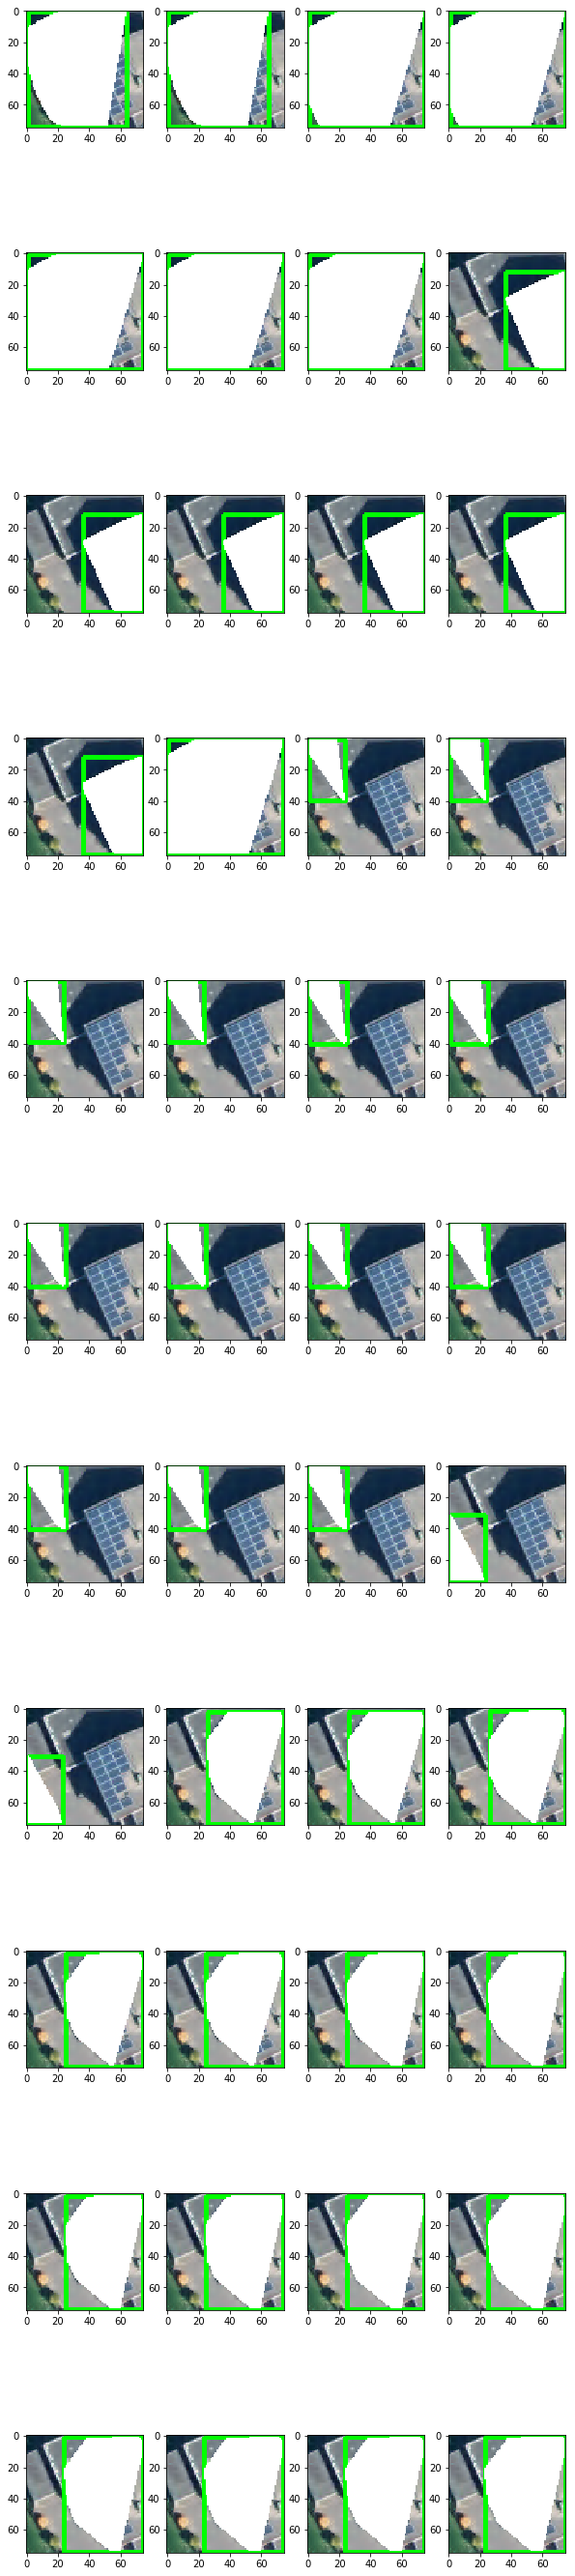

In [159]:
import math

hulls = detect_msers(orig)
visualize_msers(orig, hulls)

print(len(msers))    

In [77]:
polygons = []
for hull in hulls:
    epsilon = 0.1 * cv.arcLength(hull, True)
    polygons.append(cv.approxPolyDP(hull, epsilon, True))
    
polygons

[array([[[23, 39]],
 
        [[ 7,  6]]], dtype=int32), array([[[24, 39]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[24, 39]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[24, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[24, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[14, 69]],
 
        [[ 1, 35]]], dtype=int32), array([[[14, 69]],
 
        

In [92]:
def bb_area(hull):
    x,y,w,h = cv.boundingRect(hull) 
    return w * h

sorted_hulls = sorted(hulls, key = lambda x: bb_area(x))
sorted_hulls


[array([[[59, 25]],
 
        [[41, 34]],
 
        [[39, 32]],
 
        [[39, 29]],
 
        [[53, 22]],
 
        [[56, 21]],
 
        [[57, 21]],
 
        [[59, 23]]], dtype=int32), array([[[17, 64]],
 
        [[14, 69]],
 
        [[ 9, 65]],
 
        [[ 1, 49]],
 
        [[ 1, 35]]], dtype=int32), array([[[18, 73]],
 
        [[16, 73]],
 
        [[ 8, 64]],
 
        [[ 1, 49]],
 
        [[ 1, 34]],
 
        [[18, 64]]], dtype=int32), array([[[22, 73]],
 
        [[ 1, 73]],
 
        [[ 1, 34]],
 
        [[19, 64]]], dtype=int32), array([[[22, 73]],
 
        [[ 1, 73]],
 
        [[ 1, 34]],
 
        [[ 2, 35]],
 
        [[20, 65]]], dtype=int32), array([[[22, 73]],
 
        [[ 1, 73]],
 
        [[ 1, 32]],
 
        [[20, 65]]], dtype=int32), array([[[24, 39]],
 
        [[22, 39]],
 
        [[20, 38]],
 
        [[ 1, 10]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[24, 39]],
 
        [[23, 40]],
 
        [[20, 38]],
 
        [[ 1, 

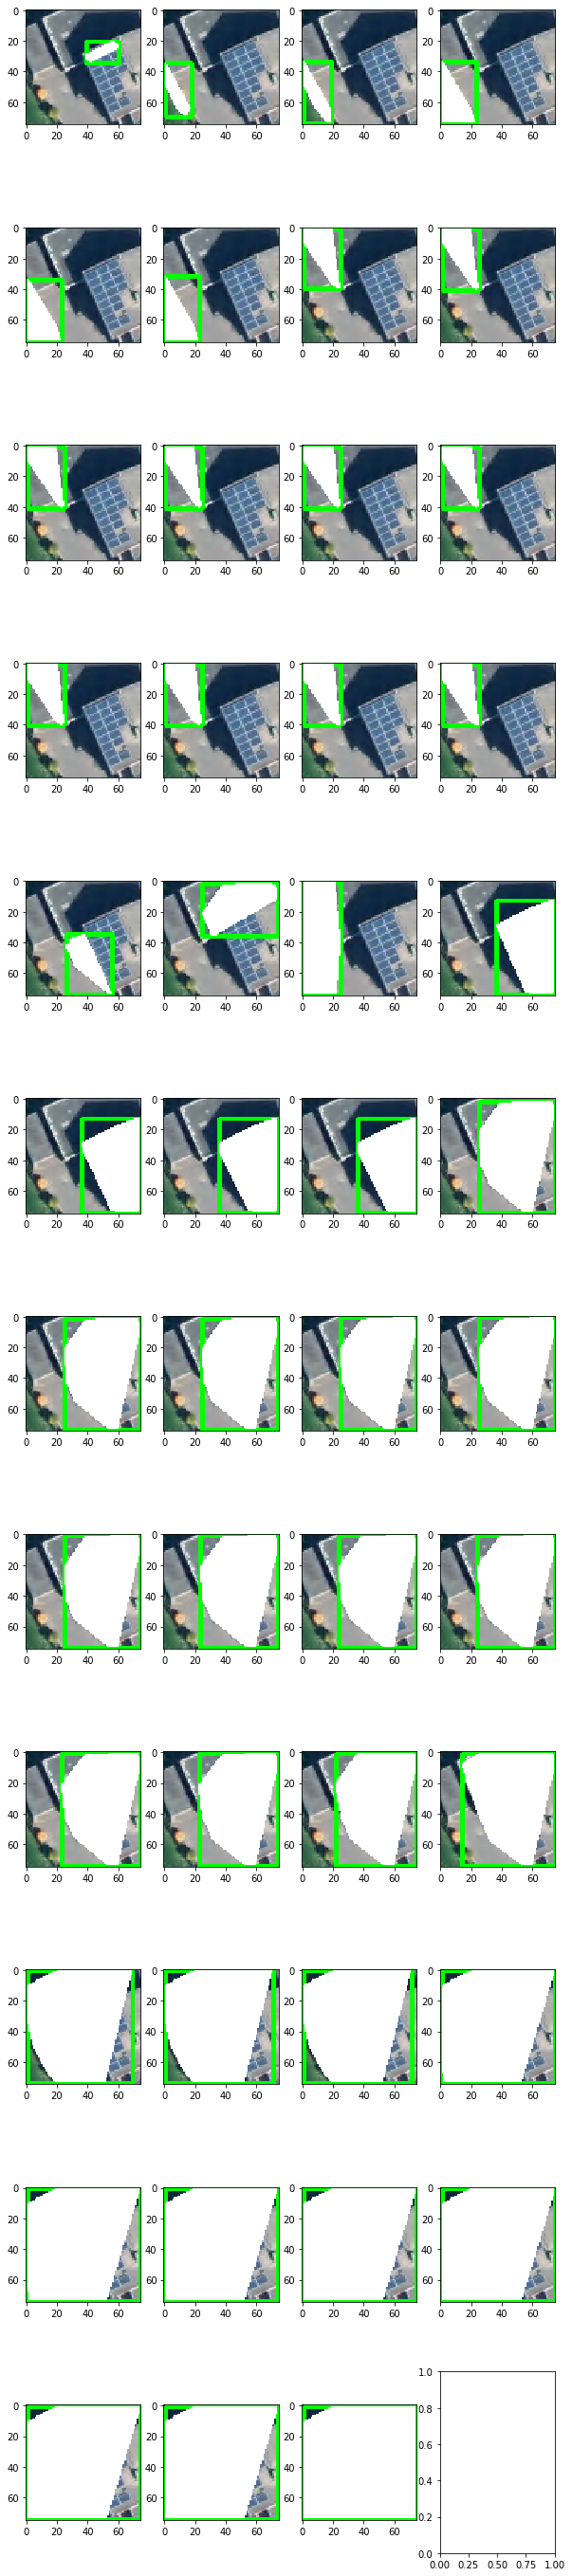

In [93]:
sorted_msers = []
for hull in sorted_hulls:
    vis = orig.copy()  
    x,y,w,h = cv.boundingRect(hull)
    cv.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
    cv.drawContours(vis, [hull], -1, (255,255,255), -1)
    sorted_msers.append(vis)

ncols = 4
nrows = math.ceil(len(sorted_msers) / ncols)
_, ax = plt.subplots(nrows, ncols, figsize=(10, 50))

r = 0
c = 0
for mser in sorted_msers:
    if c > 0 and c % ncols == 0:
        r += 1
        c = 0
    ax[r, c].imshow(mser[:,:,::-1])
    c += 1


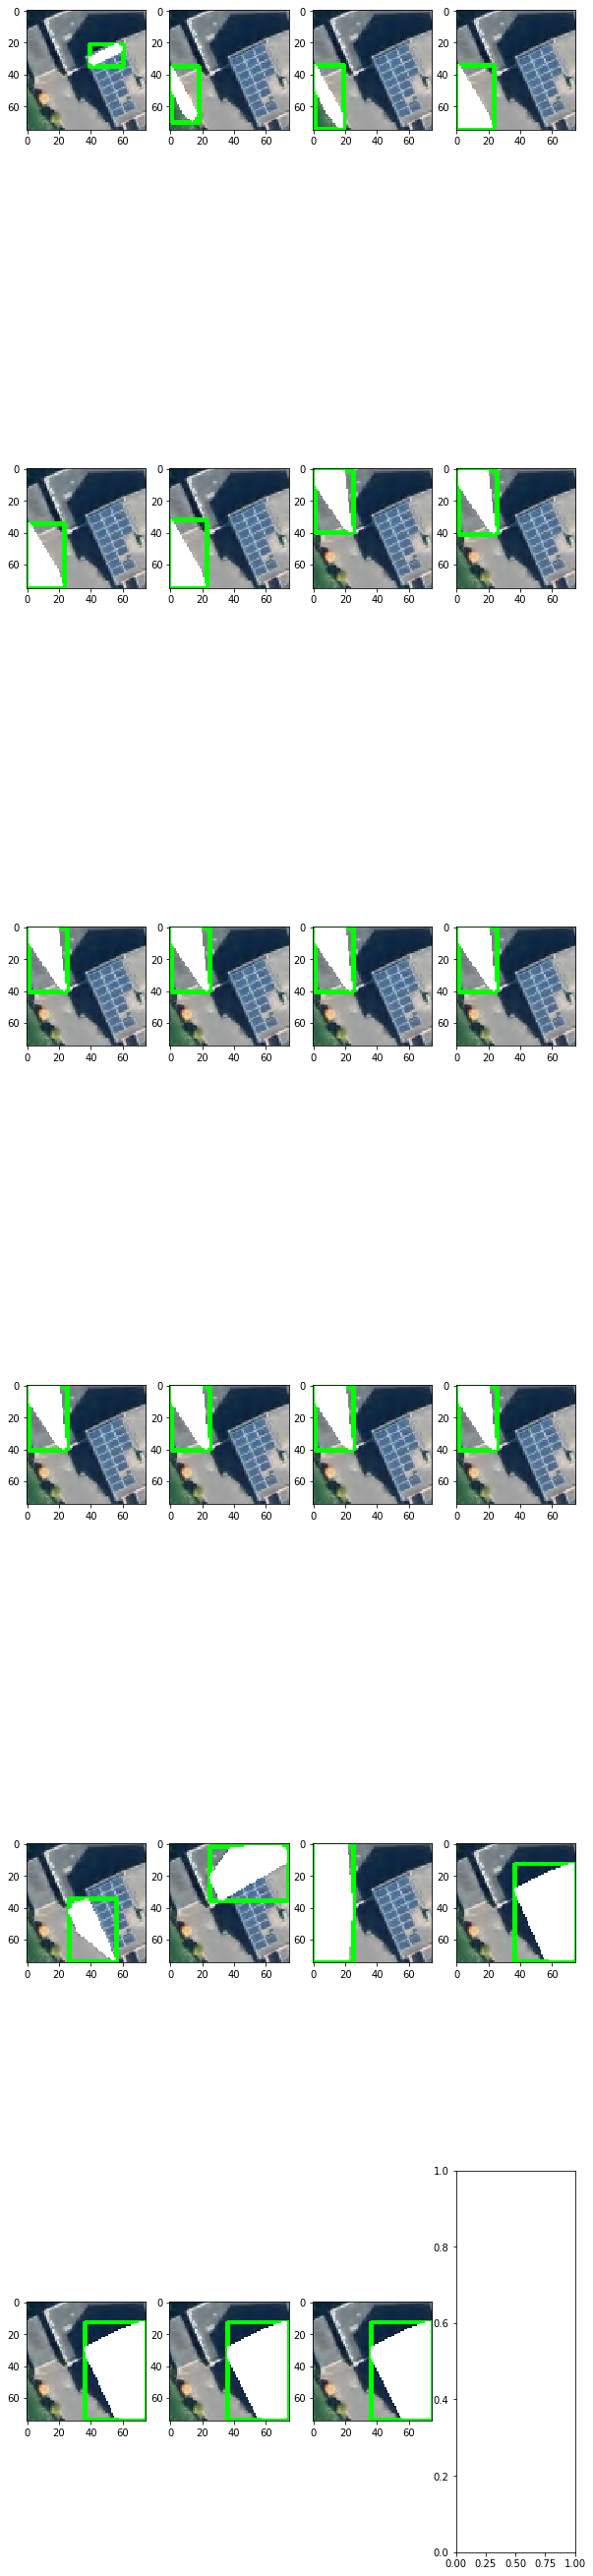

In [98]:
filtered_hulls = [hull for hull in sorted_hulls if bb_area(hull) <= 0.6 * gray.size]

filtered_msers = []
for hull in filtered_hulls:
    vis = orig.copy()  
    x,y,w,h = cv.boundingRect(hull)
    cv.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
    cv.drawContours(vis, [hull], -1, (255,255,255), -1)
    filtered_msers.append(vis)

ncols = 4
nrows = math.ceil(len(filtered_msers) / ncols)
_, ax = plt.subplots(nrows, ncols, figsize=(10, 50))

r = 0
c = 0
for mser in filtered_msers:
    if c > 0 and c % ncols == 0:
        r += 1
        c = 0
    ax[r, c].imshow(mser[:,:,::-1])
    c += 1


In [99]:
hull = filtered_hulls[-1]

epsilon = 0.1 * cv.arcLength(hull, True)
polygon = cv.approxPolyDP(hull, epsilon, True)

bb_area(hull), cv.contourArea(polygon)

(2318, 974.0)

In [170]:
def get_mask_from_mser(image, hull):
    mask = np.zeros(image.shape[0:2], dtype=np.uint8)
    cv.drawContours(mask, [hull], -1, (255,255,255), -1)
    return mask

In [172]:
#contour = filtered_hulls[-1]
#mask = np.zeros(orig.shape[0:2], dtype=np.uint8)
#cv.drawContours(mask, [contour], -1, (255,255,255), -1)
mask = get_mask_from_mser(orig, filtered_hulls[-1])
mask.shape

(75, 75)

In [198]:
def plot_hist(hist_image, mask=None):
    for i, col in enumerate(["b", "g", "r"]):
        hist = cv.calcHist([hist_image], [i], mask, [256], [0, 255])
        plt.plot(hist,color = col)
        plt.xlim([0,255])
    return hist

array([41.86107], dtype=float32)

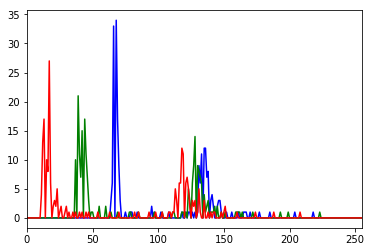

In [201]:
from scipy import stats

h1 = plot_hist(orig, mask)
scipy.stats.kurtosis(h1)

array([6.0199156], dtype=float32)

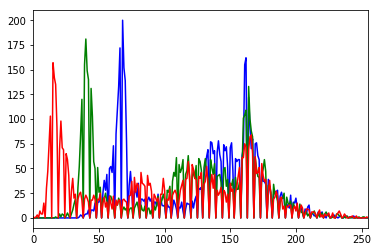

In [202]:
h2 = plot_hist(orig)
scipy.stats.kurtosis(h2)

In [166]:
def plot_image_ax(ax, image):
    corrected_image = abs(image) * 255
    ax.imshow(corrected_image[:,:,::-1].astype(int))

def plot_grid(images, grid_size=(3,3), figsize=(10,10)):
    num_rows, num_cols = grid_size
    _, ax = plt.subplots(num_rows, num_cols, figsize=figsize)
    i = 0
    for r in range(num_rows):
        for c in range(num_cols):
            if i >= len(images):
                continue
            plot_image_ax(ax[r,c], images[i])
            i += 1

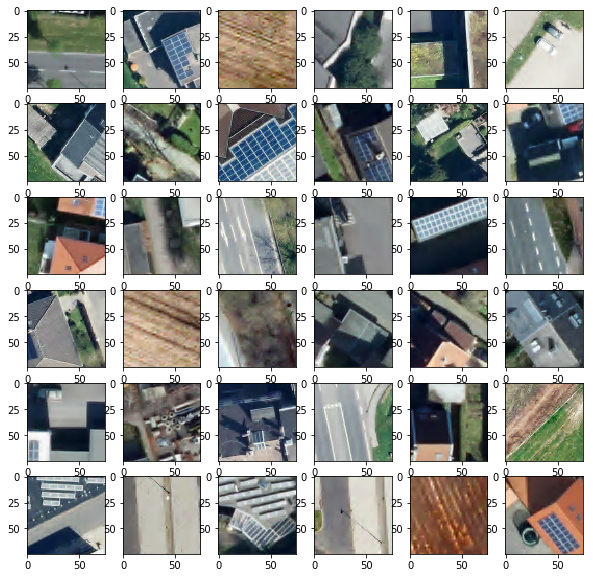

In [191]:
plot_grid(train, (6,6))

In [180]:
def training_image(index):
    im = train[index]
    return (im * 255).astype(np.uint8)

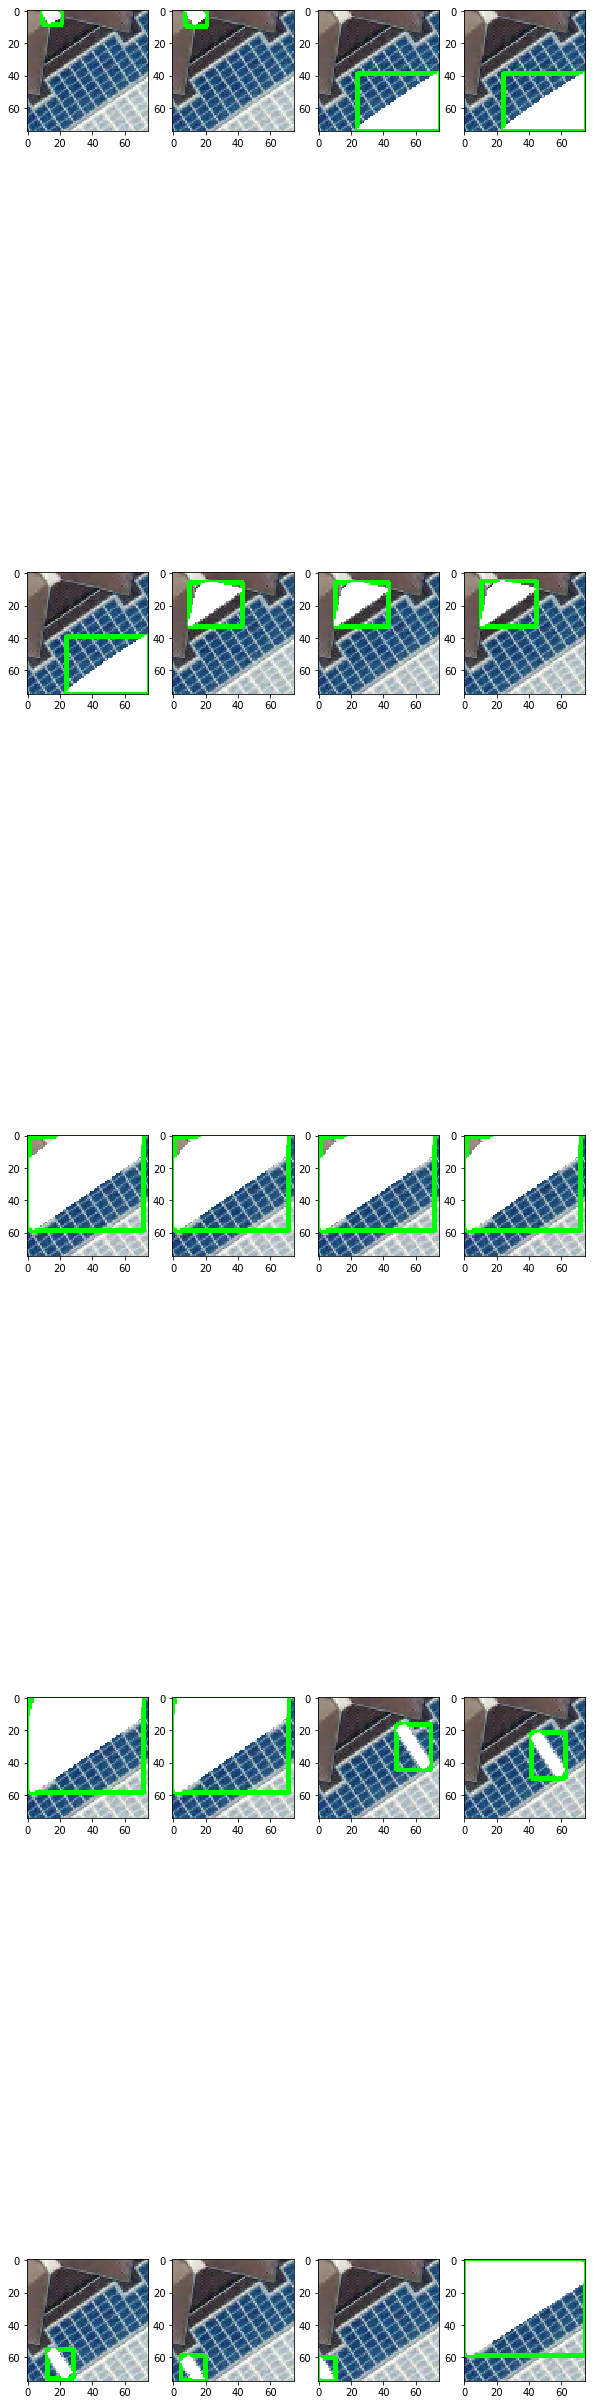

In [203]:
im = training_image(8)
hulls = detect_msers(im)
visualize_msers(im, hulls)

array([3.3148007], dtype=float32)

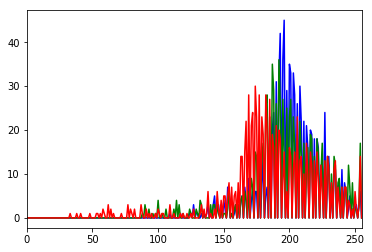

In [204]:
mask = get_mask_from_mser(im, hulls[2])
h3 = plot_hist(im, mask)
scipy.stats.kurtosis(h3)

array([0.5346863], dtype=float32)

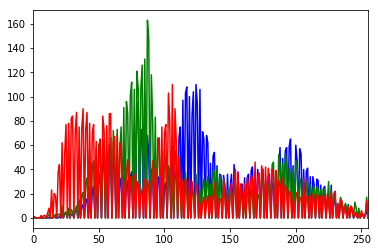

In [205]:
h4 = plot_hist(im)
scipy.stats.kurtosis(h4)

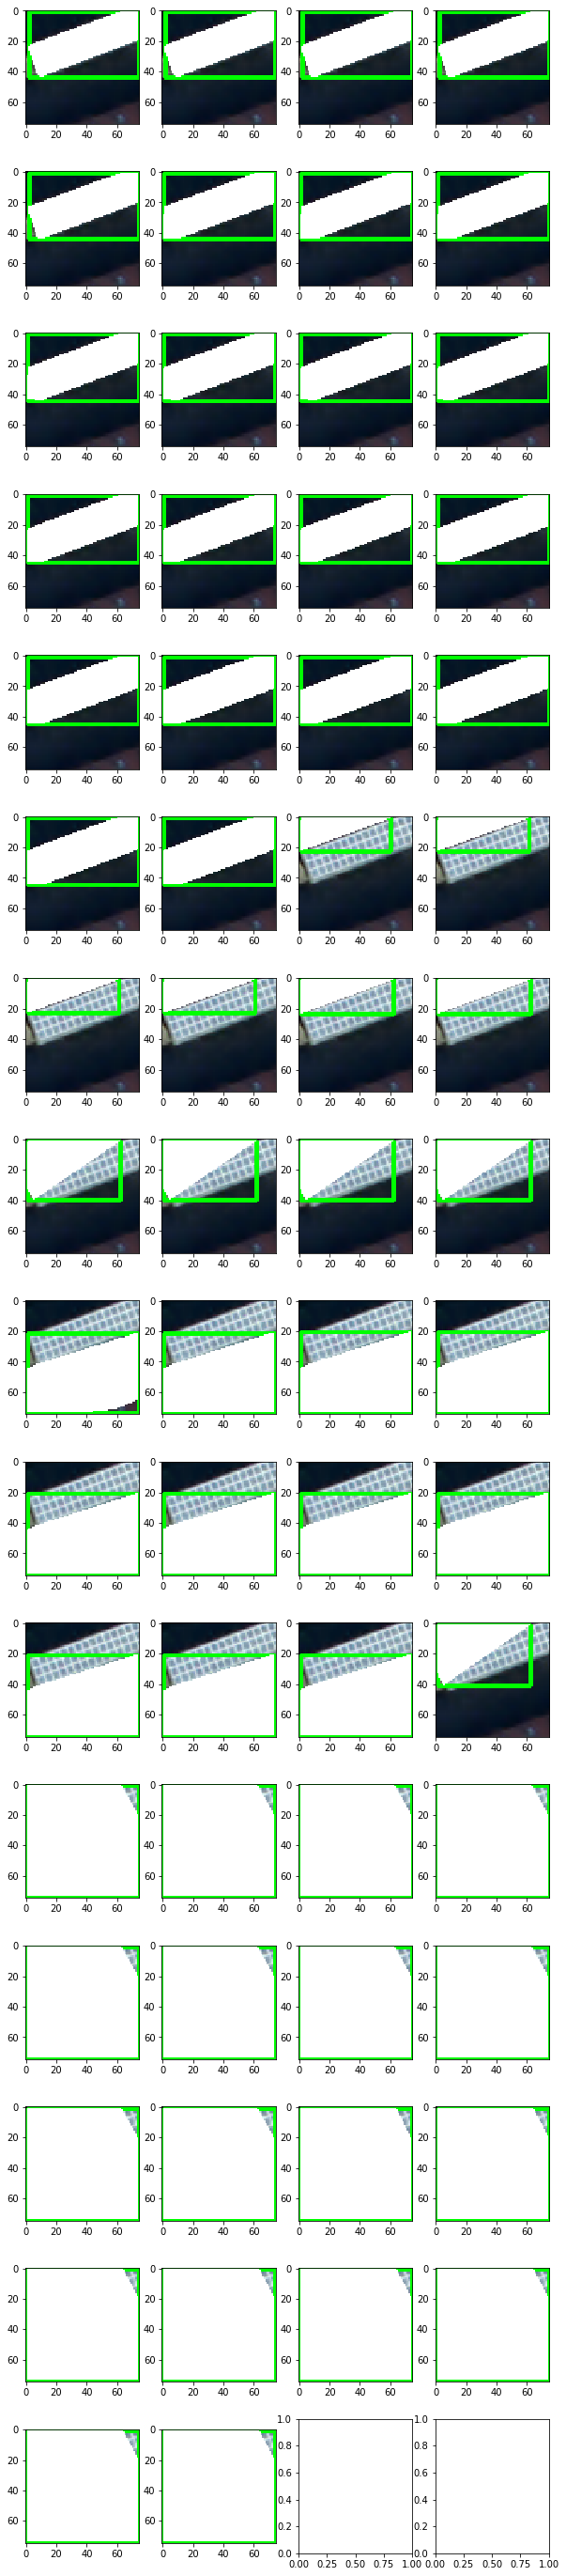

In [206]:
im2 = training_image(16)
hulls = detect_msers(im2)
visualize_msers(im2, hulls)

array([-0.0383234], dtype=float32)

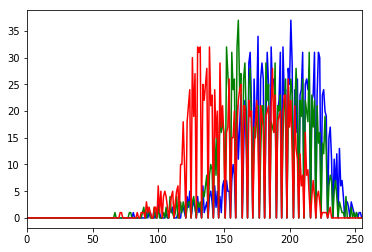

In [207]:
mask = get_mask_from_mser(im2, hulls[0])
h5 = plot_hist(im2, mask)
scipy.stats.kurtosis(h5)

array([19.542511], dtype=float32)

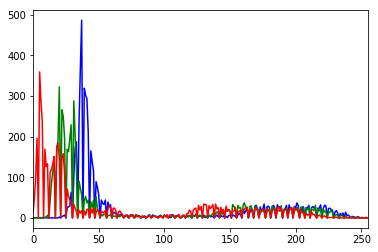

In [208]:
h6 = plot_hist(im2)
scipy.stats.kurtosis(h6)

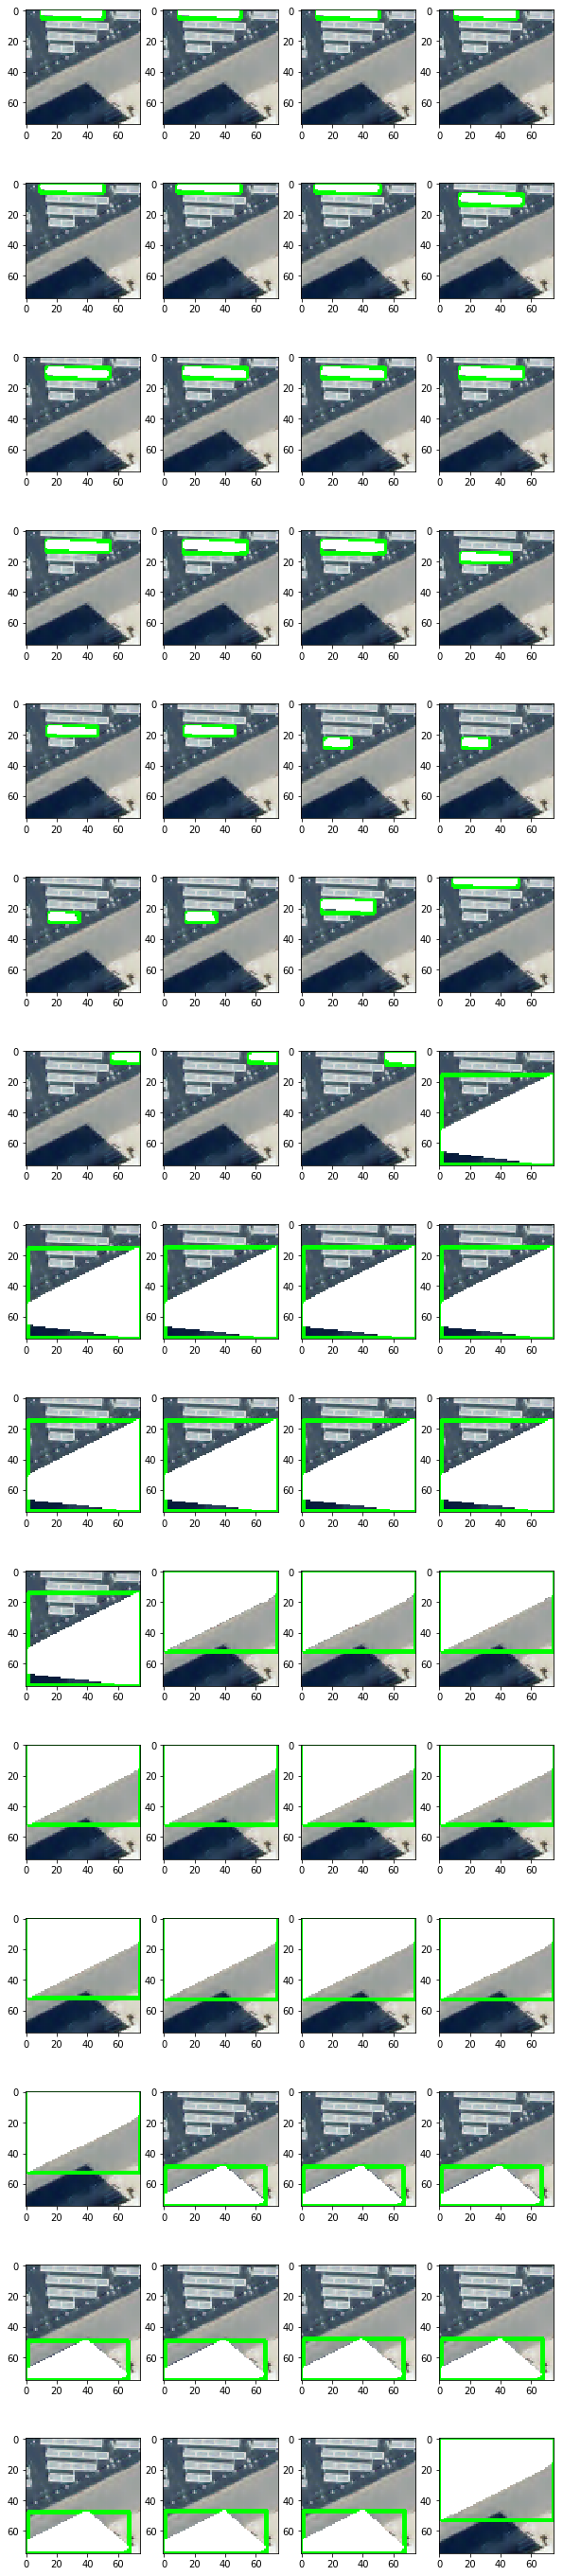

In [194]:
# with smoothing/sharpening
im3 = training_image(30)
hulls = detect_msers(im3)
visualize_msers(im3, hulls)

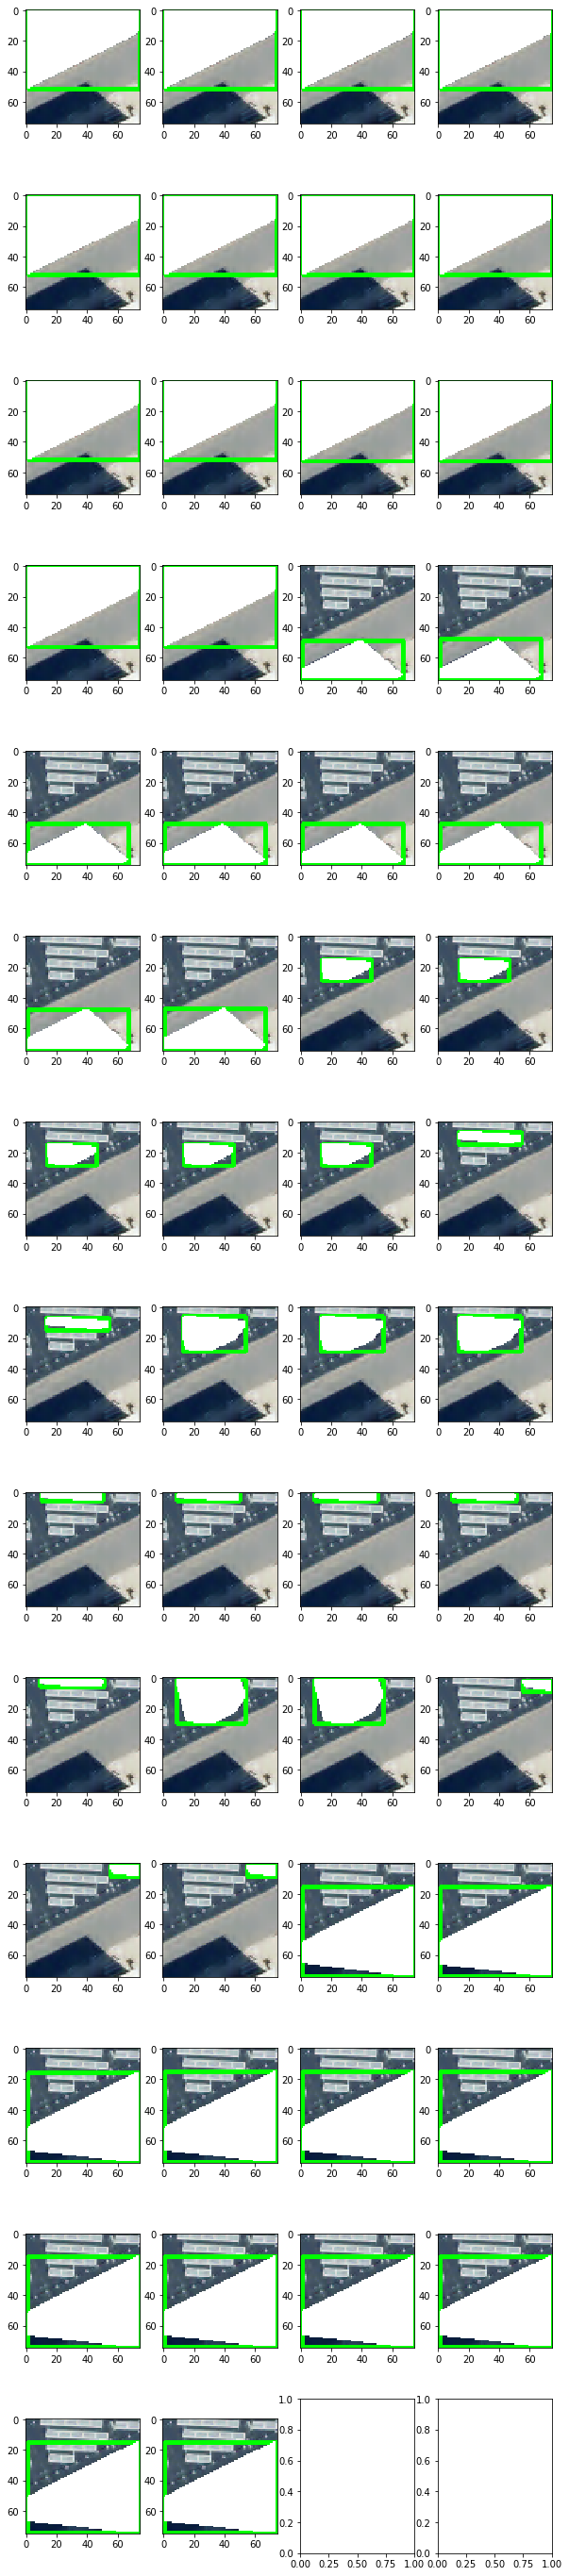

In [212]:
# without smoothing/sharpening
hulls = detect_msers2(im3)
visualize_msers(im3, hulls)

array([12.776512], dtype=float32)

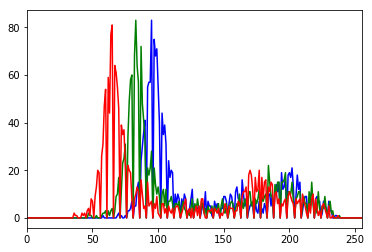

In [209]:
mask = get_mask_from_mser(im3, hulls[8])
h7 = plot_hist(im3, mask)
scipy.stats.kurtosis(h7)

array([2.1915145], dtype=float32)

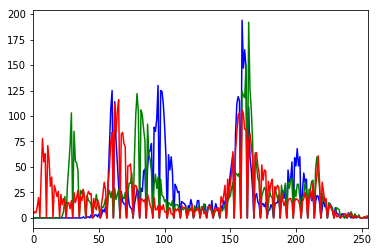

In [210]:
h8 = plot_hist(im3)
scipy.stats.kurtosis(h8)